In [3]:
# import modules
import numpy as np
import librosa
import music_gen_lib as mgl
from keras.utils import np_utils
import time
from keras import backend as K
from tensorflow.keras.layers import Layer
import tensorflow as tf
import keras
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set(context="paper", style="white", font_scale=2)
default_figure_size = (6, 4)
default_font_size = 22

### 1st: convert waveform into spectrogram in mel scale

In [6]:
# load example wavefile
example_audio_file = "blues.00000.au"
x, sr = librosa.core.load(example_audio_file)
print(x,sr)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 22050


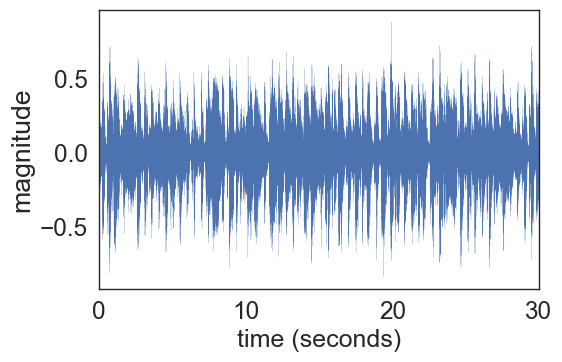

In [7]:
plt.figure(figsize=default_figure_size)
plt.plot(np.arange(1, len(x)+1) * 1.0 / sr, x, linewidth=0.11)
plt.xlim(0, 30); plt.xlabel("time (seconds)", fontsize=18); plt.ylabel("magnitude"); plt.tight_layout()
# plt.savefig("example_waveform.png", dpi=300)
plt.show()

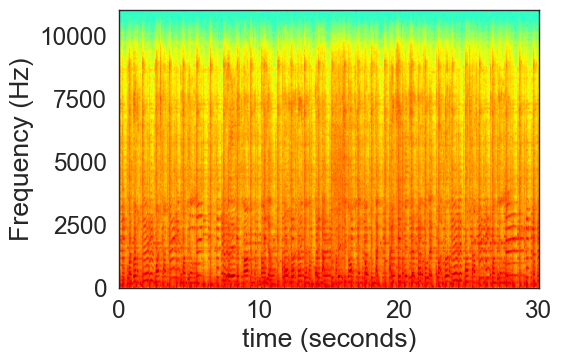

In [8]:
# convert waveform into spectrogram
plt.figure(figsize=default_figure_size)
plt.specgram(x, NFFT=512, Fs=sr, cmap="jet"); 
plt.xlim(0, 30); plt.xlabel("time (seconds)"); plt.ylabel("Frequency (Hz)"); plt.tight_layout()
# plt.savefig("example_spectrogram.png", dpi=300)
plt.show()

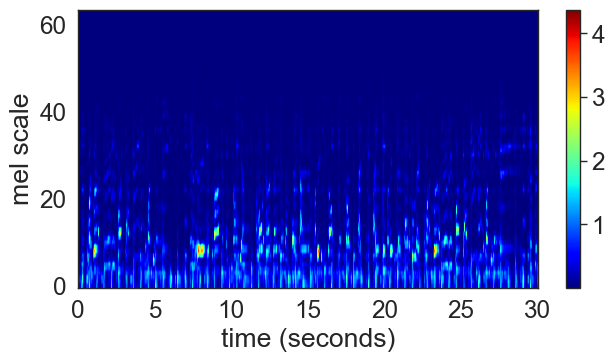

In [9]:
example_mel_spectrogram = mgl.mel_spectrogram(x, sr)
plt.figure(figsize=(default_figure_size[0]+1, default_figure_size[1]))
plt.imshow(np.log(example_mel_spectrogram+1), origin="lower", aspect="auto", cmap="jet")
plt.xticks(np.linspace(0, 2587, 7), np.arange(0, 31, 5))
plt.xlabel("time (seconds)"); plt.ylabel("mel scale"); plt.colorbar(); plt.tight_layout()
# plt.savefig("example_mel_spectrogram_colorbar.png", dpi=300)
plt.show()

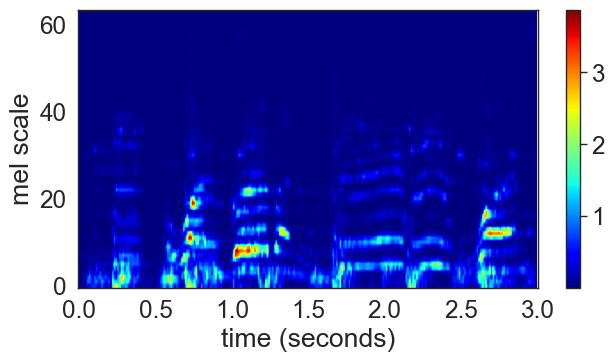

In [10]:
plt.figure(figsize=(default_figure_size[0]+1, default_figure_size[1]))
plt.imshow(np.log(example_mel_spectrogram+1)[:, :258], origin="lower", aspect="auto", cmap="jet")
plt.xticks(np.linspace(0, 258, 7), np.arange(0, 3.1, 0.5))
plt.xlabel("time (seconds)"); plt.ylabel("mel scale"); 
plt.colorbar()
plt.tight_layout()
# plt.savefig("example_mel_spectrogram_segment_colorbar.png", dpi=300)
plt.show()

### 2nd: visualize the CNN architecture

In [11]:
random_seed = 0
saved_model_name = "mgcnn_rs_" + str(random_seed) + ".h5"
# saved_model_name = "mgcnn_poisson_rs_" + str(random_seed) + ".h5"
MGCNN = mgl.Music_Genre_CNN(mgl.baseline_model)
MGCNN.load_model(saved_model_name)

AttributeError: module 'music_gen_lib' has no attribute 'baseline_model'